# Titanic - Kaggle Competition

## Overview
This is an initial run through a Kaggle competition using a well known data set - passenger information from the Titanic and who survived.

The objective is to use machine learning to predict who would survive as a way of getting comfortable with how to submit entries to Kaggle.

### Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes 

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


### Other Data Sources
https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic

link has tables with home town/country information

## Load and prep the data

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
%matplotlib inline

# signoid function, set as global lambda expression for use throughout
sig = lambda x: 1./(1+np.exp(-x))

In [17]:
# load the data
titanic_train= pd.read_csv('train.csv')
titanic_train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### First pass over data
The first thing we will do is take a look at the data types and how much data is missing (null data) from each column.

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# looking at the signficant missing data (age and cabin), an approach to impute the values will need to be explored.

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_train.shape

(891, 12)

In [6]:
# Cabin data is missing for 77% of the training data
687/891.

0.7710437710437711

### Ticket Data
Let's take a look at the ticket data to see how we may be able to use it.

In [10]:
titanic_train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [11]:
titanic_train['Ticket_num'] =\
    titanic_train['Ticket'].apply(lambda x: pd.Series(x.split()[-1]))
titanic_train['tick_len'] = titanic_train['Ticket_num'].apply(lambda x: pd.Series(len(x)))

In [16]:
titanic_train['tick_len'].value_counts()

6    423
5    246
4    169
7     44
3      7
1      2
Name: tick_len, dtype: int64

In [18]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pulling apart Name Data

In [19]:
# df['Attr'] = df['Name'].str.extract(r"\((.*?)\)", expand=False)

titanic_train['Maiden'] = titanic_train['Name'].str.extract(r"\((.*?)\)", expand=False)

In [24]:
titanic_train['Maiden'].nunique()

143

In [25]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic_train['Last_name'] = \
    titanic_train['Name'].apply(lambda x: pd.Series(x.split(",")[0]))
titanic_train['title'] = \
    titanic_train['Name'].apply(lambda x: pd.Series(x.split(" ")[1]))
    

In [30]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maiden,Last_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Florence Briggs Thayer,Cumings,Mrs.


In [31]:
titanic_train['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4e0e50>]], dtype=object)

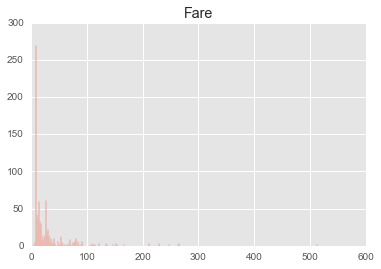

In [36]:
titanic_train.hist('Fare',bins = 300)

In [38]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Maiden         143 non-null object
Last_name      891 non-null object
title          891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [48]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Next Up:
* split ticket into prefix and number columns
* split cabin into letter and cabin# columns
* split name into title, first, last, (maiden?)